# Table of Contents
* [1. Introduction](#introduction)
* [2. Import Libraries](#libraries)
* [3. Load Dataset](#dataset)
* [4. Summarize Data](#summarize-data)
* [5. Algorithm Evaluation](#eval)
* [6. Prepare Data](#prepare)
* [7. Finalize Model](#finalize-model)
* [8. Test Model](#test-model)
* [9. Conclusion](#conclusion)

# 1. Introduction <a id="introduction"></a>
Breast cancer is cancer that develops from breast tissue<sup>1</sup>.

It's a binary classification problem and the diagnosis can be distinguished either as benign, or malignant (cancer).

[1] [Wikipedia](https://en.wikipedia.org/wiki/Breast_cancer)

# 2. Import Libraries <a class='anchor' id="libraries"></a> 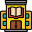

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-linear Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Ensemble Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics for performance evaluaiton
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 3. Load Dataset <a id="dataset"></a> 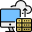

In [2]:
df = pd.read_csv('Data/data.csv')
df.head(10)

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# 4. Summarize Data <a id='summarize-data'></a> 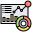

In [3]:
df.shape

(569, 32)

🔎 **Observarions:** There are 569 rows and 32 features in this dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

🔎 **Observarions:** It seems that all of the features are numeric except the target column.

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
Texture_mean,569.0,NaN,NaN,NaN,19.296678,4.301816,9.71,16.17,18.87,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


B    357
M    212
Name: diagnosis, dtype: int64

Ratio of the Benign cases 62.74%
Ratio of the Malignant cases 37.26%


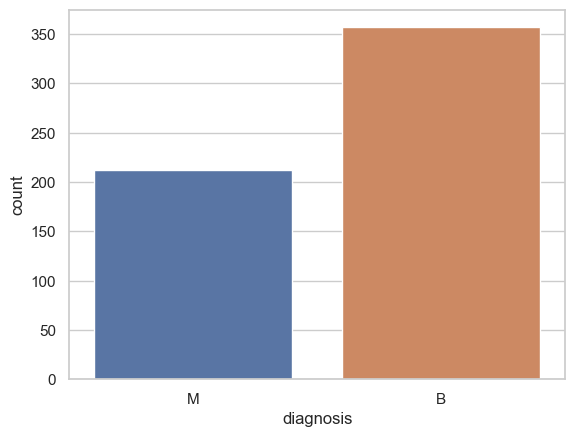

In [6]:
print(df['diagnosis'].value_counts())

b = (df['diagnosis'].value_counts()[0] / len(df['diagnosis'])) * 100
m = (df['diagnosis'].value_counts()[1] / len(df['diagnosis'])) * 100

print('\nRatio of the Benign cases %.2f%%' % b)
print('Ratio of the Malignant cases %.2f%%' % m)

sb.countplot(x=df['diagnosis'])
plt.show()

🔎 **Observation:** We can relatively say that the dataset is balanced. We are safe to focus on the **Accuracy** score while evaluating the perfomance of the ML models.

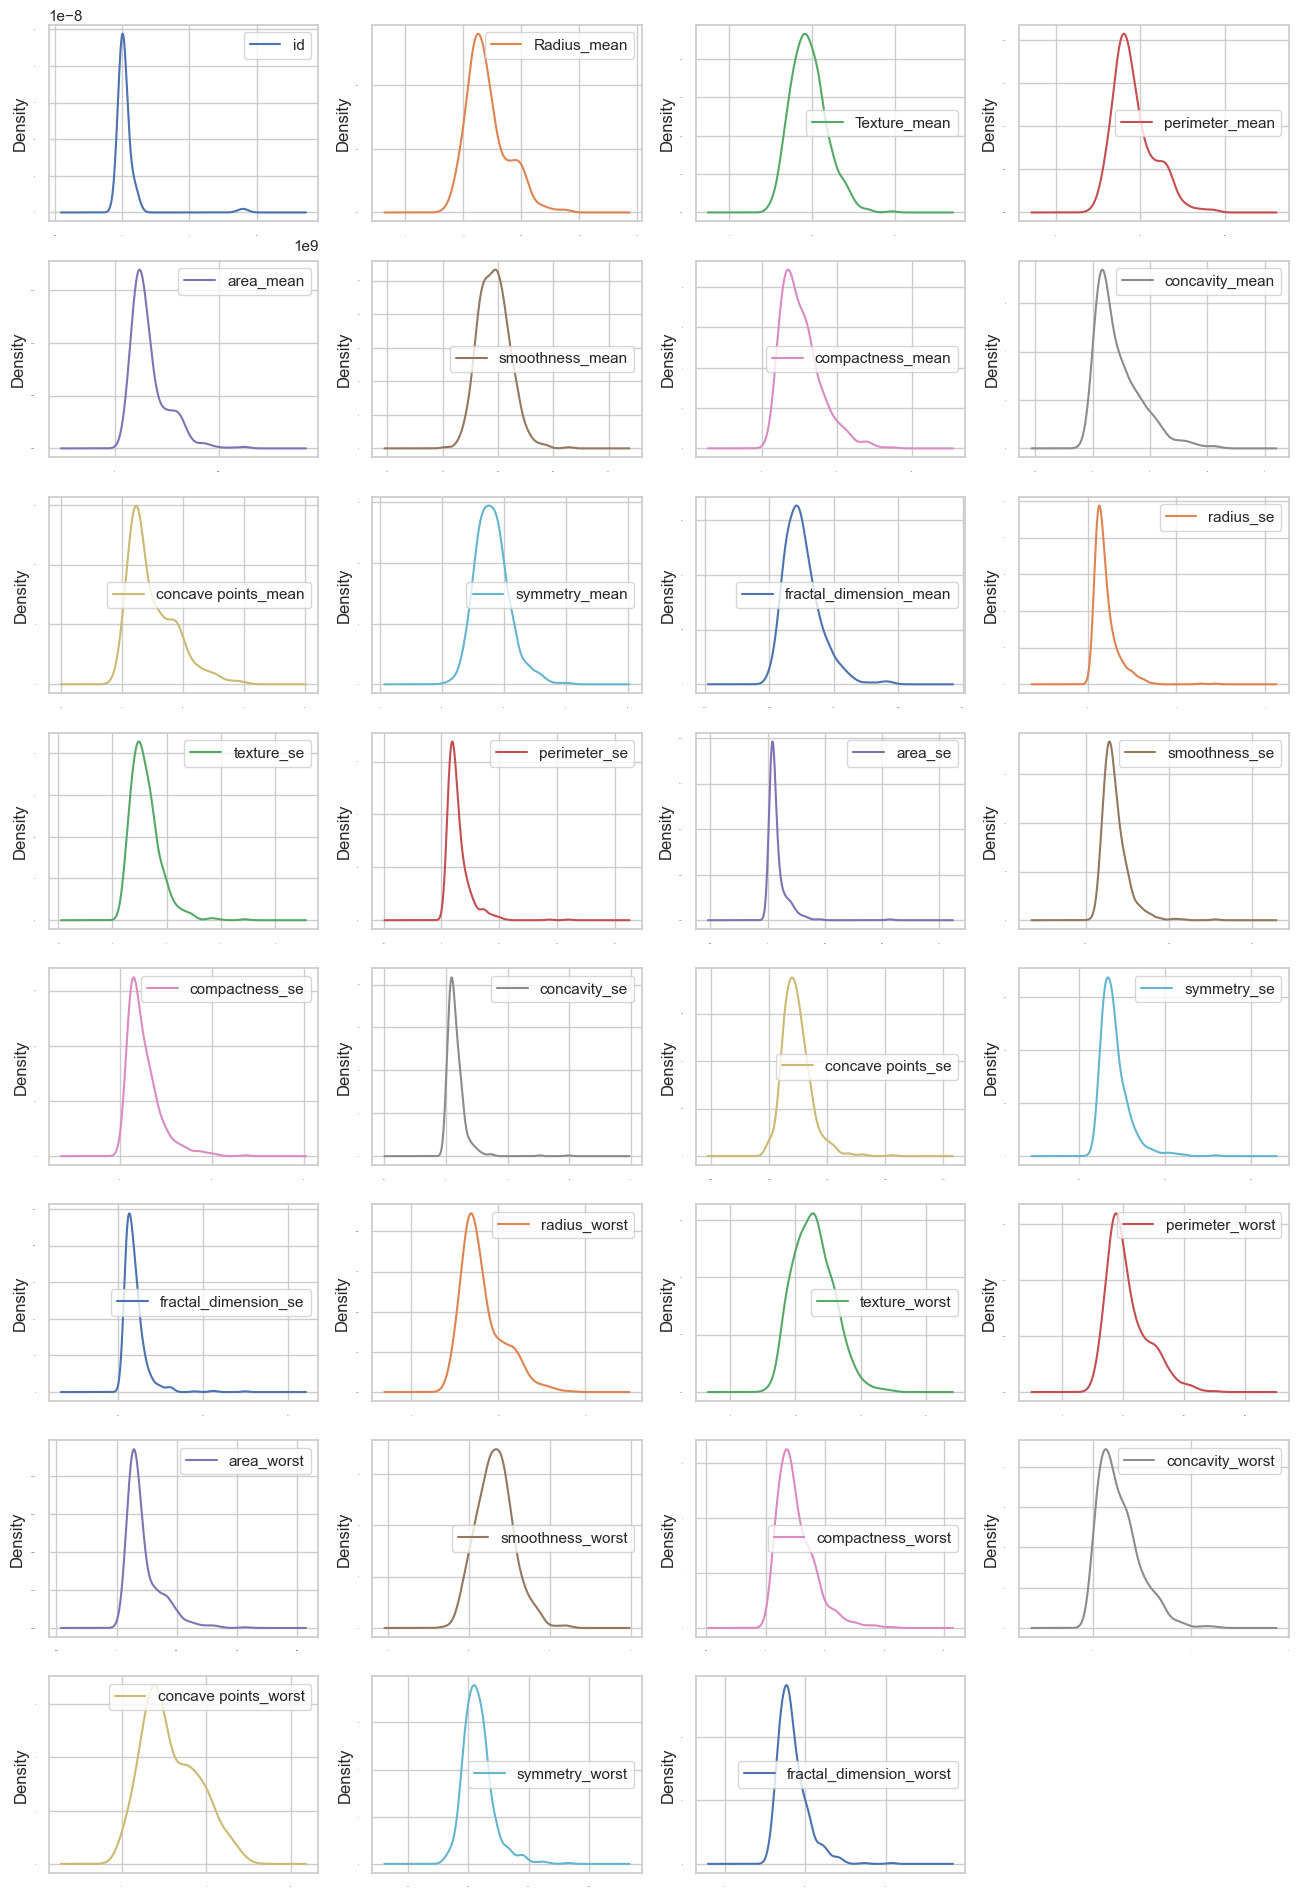

In [7]:
# Let's check the distribution of the numerical feature
df.drop('diagnosis', axis=1).plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(16,24))
plt.show()

🔎 **Observation:** We are going to ignore *id* column. As you can see on the above chart, even though some features left skewed, all of them follows the normal distribution.

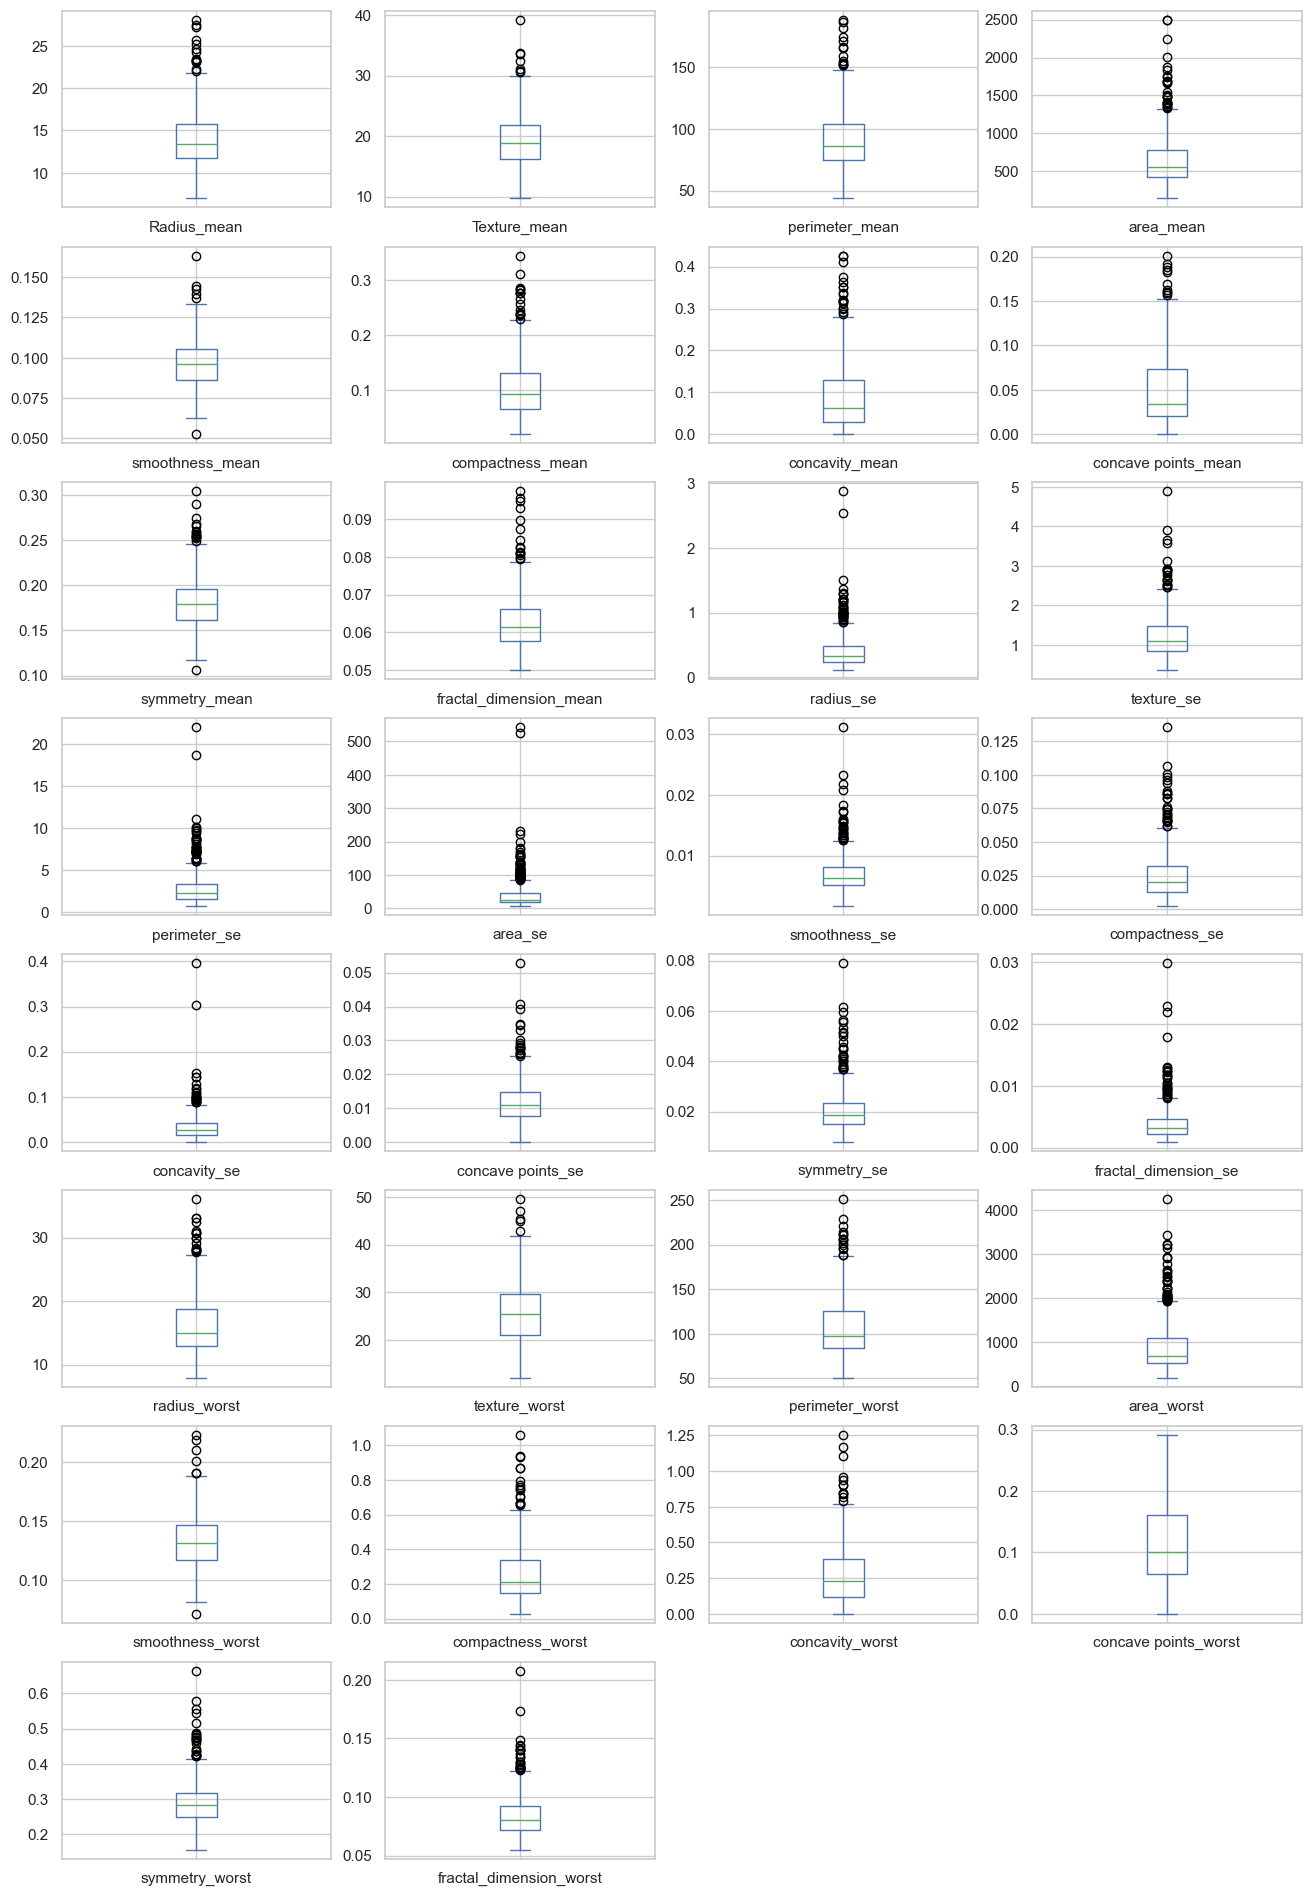

In [8]:
# Let's check the distribution of the numerical feature
df.drop(['diagnosis', 'id'], axis=1).plot(
    kind='box', 
    subplots=True, 
    layout=(8,4), 
    sharex=False, 
    legend=True, 
    figsize=(16,24)
)
plt.show()

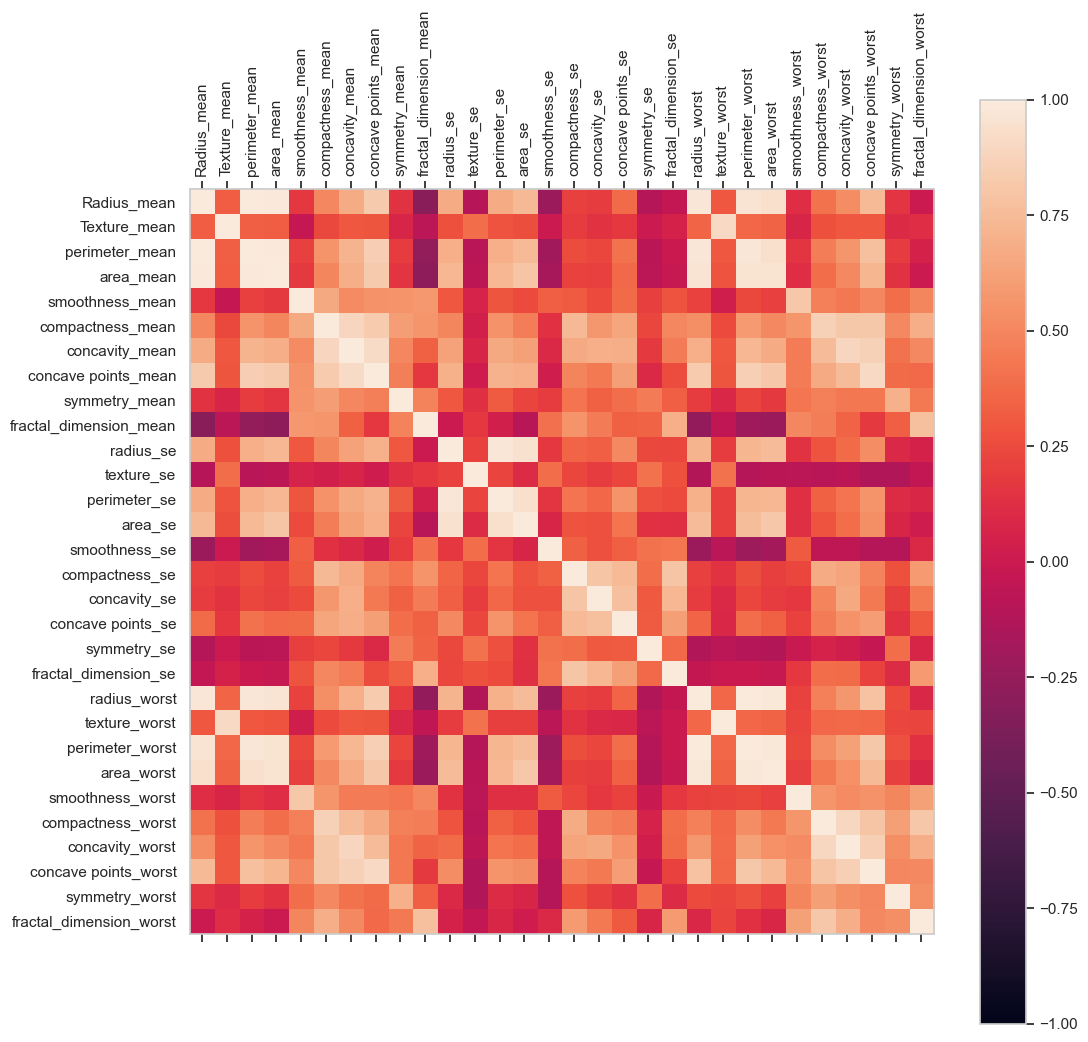

In [9]:
# Correlation
df_corr = df.drop(['id', 'diagnosis'], axis=1)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = np.arange(0, len(df_corr.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90)
ax.set_yticklabels(df_corr.columns)
plt.show()

🔎 **Observation:** There are a lot of features that have strong correlation to each other. We might need to a type of feature selection method. First we need to check the baseline then we should decide if we need or not.

# 5. Algorithm Evaluation <a id='eval'></a> 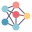

In [10]:
# Constants for training and evaluation options
seed = 101
n_fold = 10
scr = 'accuracy'

# Create a function that evaluates different algorithms can be used for each update on the model
def evaluate_algorithms(x, y):
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('SVC', SVC()))
    models.append(('RFC', RandomForestClassifier()))
    models.append(('ABC', AdaBoostClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    
    names = []
    results = []
    
    for name, model in models:
        kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)
        cv_result = cross_val_score(model, x, y, cv=kfold, scoring=scr)
        results.append(cv_result)
        names.append(name)
        msg = '%s - Mean ACC: %.2f%% STD(%.2f)' % (name, (cv_result.mean() * 100), cv_result.std())
        print(msg)
    
    # Plot results
    fig = plt.figure(figsize=(12,8))
    fig.suptitle('Algorithm Comparison', fontsize=16, y=0.93)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=14)
    plt.show()


# 6. Prepare Data <a id='prepare'></a> 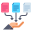

In [11]:
# Let's create a copy of the data before making any changes on it
data = df.copy()
# Drop the id columns as it's not useful for the model
data = data.drop('id', axis=1)
data.shape

(569, 31)

In [12]:
# Map the classes
dt_map = {'B':0, 'M':1}
data['diagnosis'] = data['diagnosis'].map(dt_map)
data['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## 6.1. Drop Duplicates

In [13]:
nr_rows = data.shape[0]
print('Number of rows: %d' % nr_rows)
data = data.drop_duplicates().reset_index(drop=True)
print('Number of dropped rows: %d' % (nr_rows - data.shape[0]))
print('Number of remainin rows: %d' % data.shape[0])

Number of rows: 569
Number of dropped rows: 0
Number of remainin rows: 569


## 6.2. Train Test Split

In [14]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

labeler = LabelEncoder()
y_cat = labeler.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=seed) 

LR - Mean ACC: 94.08% STD(0.04)
LDA - Mean ACC: 95.61% STD(0.03)
KNN - Mean ACC: 92.54% STD(0.03)
GNB - Mean ACC: 94.07% STD(0.04)
DTC - Mean ACC: 90.56% STD(0.05)
SVC - Mean ACC: 90.99% STD(0.03)
RFC - Mean ACC: 96.71% STD(0.02)
ABC - Mean ACC: 95.39% STD(0.03)
GBC - Mean ACC: 95.16% STD(0.03)


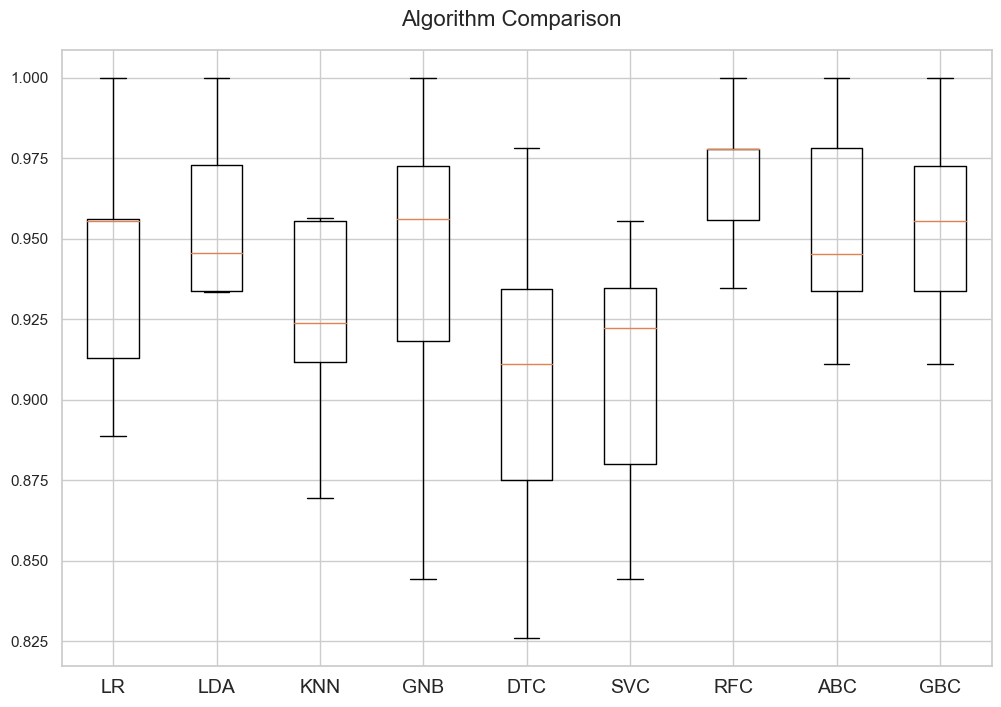

In [15]:
# Evaluating algorithms for the baseline
import warnings
warnings.filterwarnings('ignore')
evaluate_algorithms(x_train, y_train)

🔎 **Observation:** The best accuracy score is provided by RFC which is slightly better than LDA. It's better to check for outliers and scale the data as the range of the min and max values are wide for numerical features.

## 6.3. Scaling Data

In [16]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

LR - Mean ACC: 96.94% STD(0.03)
LDA - Mean ACC: 95.61% STD(0.03)
KNN - Mean ACC: 97.15% STD(0.02)
GNB - Mean ACC: 94.29% STD(0.04)
DTC - Mean ACC: 91.86% STD(0.04)
SVC - Mean ACC: 97.82% STD(0.02)
RFC - Mean ACC: 95.84% STD(0.03)
ABC - Mean ACC: 95.39% STD(0.03)
GBC - Mean ACC: 95.16% STD(0.03)


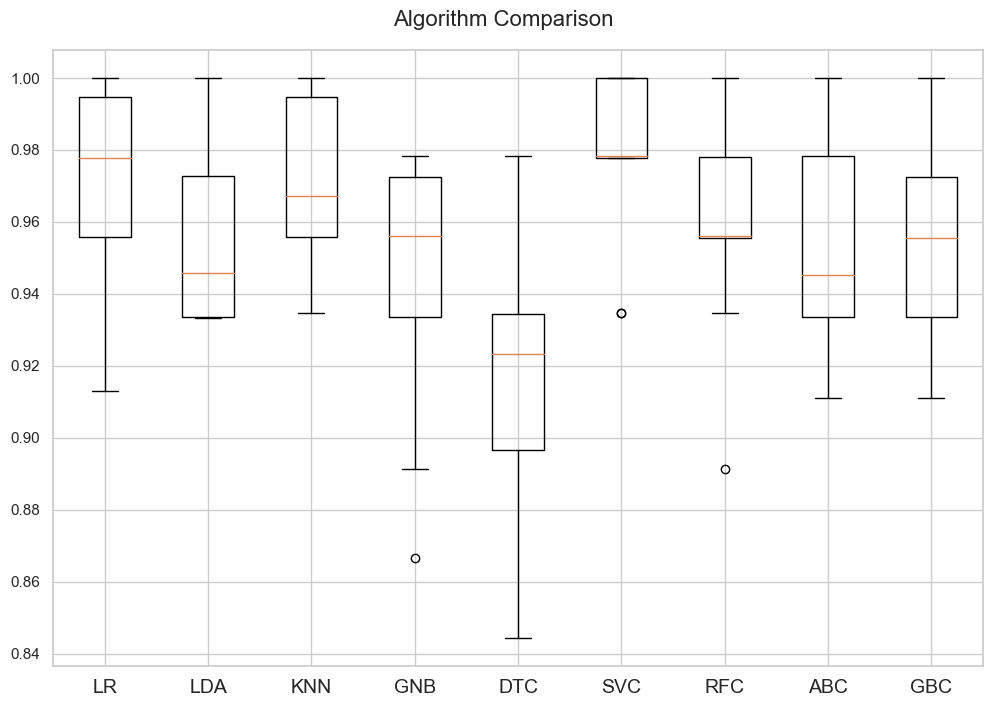

In [17]:
evaluate_algorithms(x_train_scaled, y_train)

**Observation:** As you can see on the above chart, Scaling the data improved the performance of the SVC dramatically which makes it a very good candidate for hyper-parameter tuning.

# 7. Finalize Model <a id='finalize-model'></a> 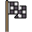

In [18]:
# Hyper-parameter tuning
h_params = {'C': [0.1,1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']}
model = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=h_params, cv=kfold)
grid.fit(x_train_scaled, y_train)

print('Best accuracy score: %.2f%%' % (grid.best_score_*100))
print('Best parameters', grid.best_params_)

Best accuracy score: 98.02%
Best parameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# 8. Test Model <a id='test-model'></a> 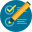

In [19]:
# First we need train the model to test it
model = SVC(**grid.best_params_)
model.fit(x_train_scaled, y_train)

SVC(C=10, gamma=0.1)

In [20]:
predictions = model.predict(x_test_scaled)
print('Accuracy score: %.2f%%' % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))

Accuracy score: 98.25%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



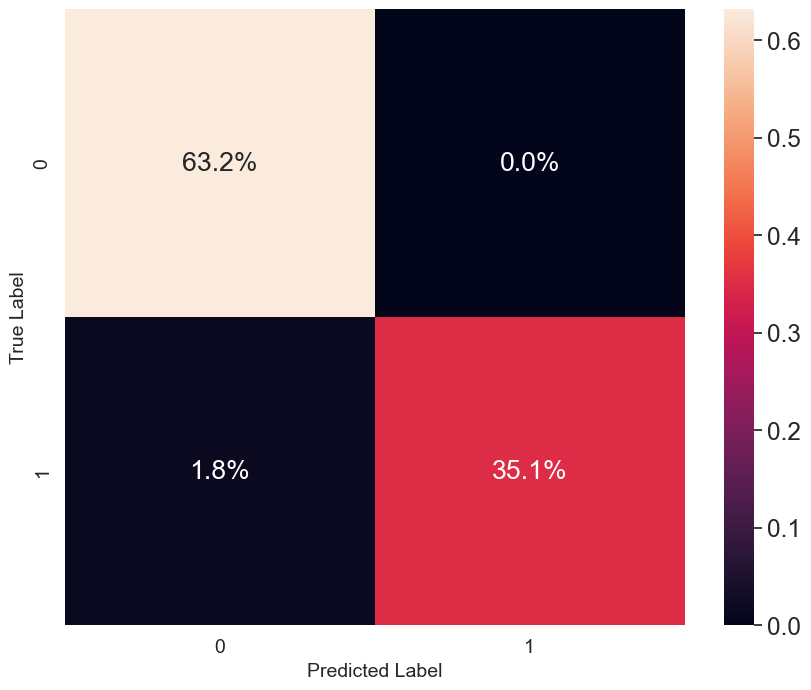

In [21]:
# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 9. Conclusion <a id='conclusion'></a> 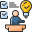

The purpose of this study wasy to create a model that can predict if a tumor is benign or malignant based on the given features. The SVC provided the best accuracy score with the given hyper-paramters. We also observed that scaling the data improved the performance of the algorithm for the sample dataset.
As a next step, outliers can be removed to check if improves the performance or not.

---

In [22]:
# Save the model
import joblib

joblib.dump(model, 'Models/trained_model.joblib')

['Models/trained_model.joblib']

In [23]:
# Saving the scaler 
joblib.dump(scaler, 'Models/scaler.joblib')

['Models/scaler.joblib']